In [24]:
%run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb
%matplotlib inline


All MAC paths are set!


<Figure size 800x500 with 0 Axes>

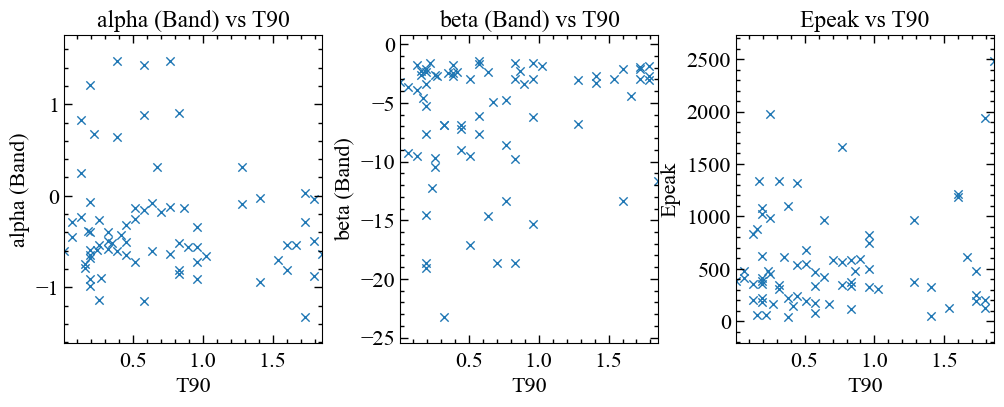

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the txt file as a dataframe
df_fermiCat = pd.read_csv('/Users/andreas/phys/master/GRB/xspec/FERMI/FERMI_cat.txt', delimiter='|', skipinitialspace=True)

# clean up the column names
df_fermiCat.columns = df_fermiCat.columns.str.strip()

# remove any leading/trailing whitespace in the data
df_fermiCat = df_fermiCat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# remove "flnc_band" from column names
df_fermiCat = df_fermiCat.rename(columns=lambda x: x.replace('flnc_band_', '') if 'flnc_band_' in x else x)

df_fermiCat = df_fermiCat.drop(columns=['Unnamed: 0', 'Unnamed: 6'])

df_fermiCat = df_fermiCat.rename(columns={'name': 'GRB', 't90': 'T90', 'epeak': 'Epeak'})

# drop rows where T90 > 2.1
df_fermiCat = df_fermiCat[df_fermiCat['T90'] <= 2.0]

#drop nan rows
df_fermiCat = df_fermiCat.dropna()

#dropping outliers-->
# find index of row where alpha (Band) > 20 and epeak > 4000
drop_index = df_fermiCat[(df_fermiCat['alpha'] > 20) | (df_fermiCat['Epeak'] > 4000)].index

# drop the row at drop_index
df_fermiCat = df_fermiCat.drop(drop_index)

# reset the index of the dataframe
df_fermiCat = df_fermiCat.reset_index(drop=True)


# create three scatter plots side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(df_fermiCat['T90'], df_fermiCat['alpha'])
axs[1].scatter(df_fermiCat['T90'], df_fermiCat['beta'])
axs[2].scatter(df_fermiCat['T90'], df_fermiCat['Epeak'])

# add axis labels and a title to each plot
axs[0].set_xlabel('T90')
axs[0].set_ylabel('alpha (Band)')
axs[0].set_title('alpha (Band) vs T90')
axs[1].set_xlabel('T90')
axs[1].set_ylabel('beta (Band)')
axs[1].set_title('beta (Band) vs T90')
axs[2].set_xlabel('T90')
axs[2].set_ylabel('Epeak')
axs[2].set_title('Epeak vs T90')

# adjust spacing between plots and show the plot
plt.subplots_adjust(wspace=0.3)
plt.show()


In [102]:
alpha = df_fermiCat['alpha'].to_numpy(dtype=np.float32)
beta = df_fermiCat['beta'].to_numpy(dtype=np.float32)
epeak = df_fermiCat['Epeak'].to_numpy(dtype=np.float32)
print(f'\u03B1, mean: {alpha.mean():.3g}, std: {alpha.std():.3g}')
print(f'\u03B2, mean: {beta.mean():.3g}, std: {beta.std():.3g}')
print(f'Epeak, mean: {epeak.mean():.3g}, std: {epeak.std():.3g}')

α, mean: -0.306, std: 0.61
β, mean: -6.36, std: 5.31
Epeak, mean: 574, std: 484


In [103]:
corr = df_fermiCat[['T90', 'alpha', 'beta', 'Epeak']].corr()
print(corr)


            T90     alpha      beta     Epeak
T90    1.000000 -0.125805  0.158742  0.130986
alpha -0.125805  1.000000 -0.064902 -0.321611
beta   0.158742 -0.064902  1.000000 -0.184678
Epeak  0.130986 -0.321611 -0.184678  1.000000


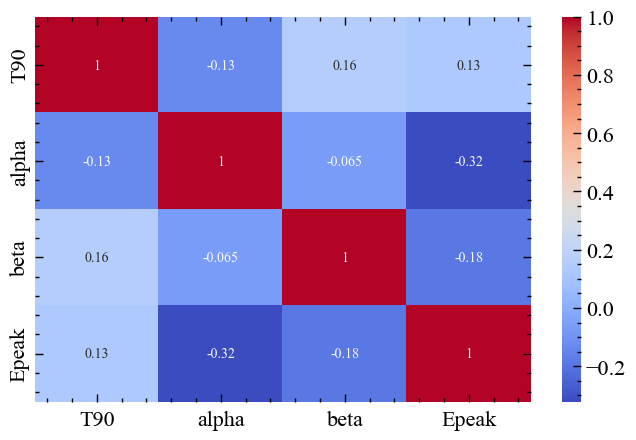

In [104]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficients in the correlation matrix reflect the linear relationship between each pair of variables. The values range from -1 to 1, with 1 indicating a perfect positive linear correlation (i.e., the variables increase or decrease together), -1 indicating a perfect negative linear correlation (i.e., one variable increases as the other decreases), and 0 indicating no linear correlation.

Looking at the correlation matrix for the variables 'T90', 'alpha', 'beta', and 'Epeak':

The correlation coefficient between T90 and alpha is -0.126, indicating a weak negative correlation. This suggests that there is a slight tendency for GRBs with longer durations (i.e., higher T90 values) to have slightly lower alpha (Band) values.

The correlation coefficient between T90 and beta is 0.159, indicating a weak positive correlation. This suggests that there is a slight tendency for GRBs with longer durations to have slightly higher beta (Band) values.

The correlation coefficient between T90 and Epeak is 0.131, indicating a weak positive correlation. This suggests that there is a slight tendency for GRBs with longer durations to have slightly higher Epeak values.

The correlation coefficient between alpha and beta is -0.065, indicating a very weak negative correlation. This suggests that there is almost no linear relationship between the values of alpha and beta.

The correlation coefficient between alpha and Epeak is -0.322, indicating a weak negative correlation. This suggests that there is a tendency for GRBs with lower alpha (Band) values to have slightly higher Epeak values.

The correlation coefficient between beta and Epeak is -0.185, indicating a weak negative correlation. This suggests that there is a tendency for GRBs with lower beta (Band) values to have slightly higher Epeak values.

Overall, the correlation coefficients suggest that there is no strong linear relationship between any of the variables. The weak correlations that do exist suggest only slight tendencies rather than strong relationships.